In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

c:\Users\dany0\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./Clinical/heart_failure_clinical_records_dataset.csv', sep=',')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:ylabel='count'>

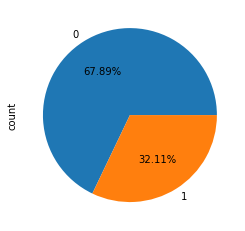

In [4]:
df['DEATH_EVENT'].value_counts().plot(kind='pie', autopct='%.2f%%')


<AxesSubplot:ylabel='Frequency'>

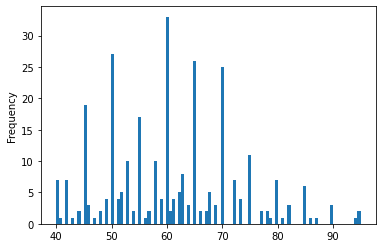

In [5]:
df['age'].plot(kind='hist', bins=100)

<AxesSubplot:xlabel='age'>

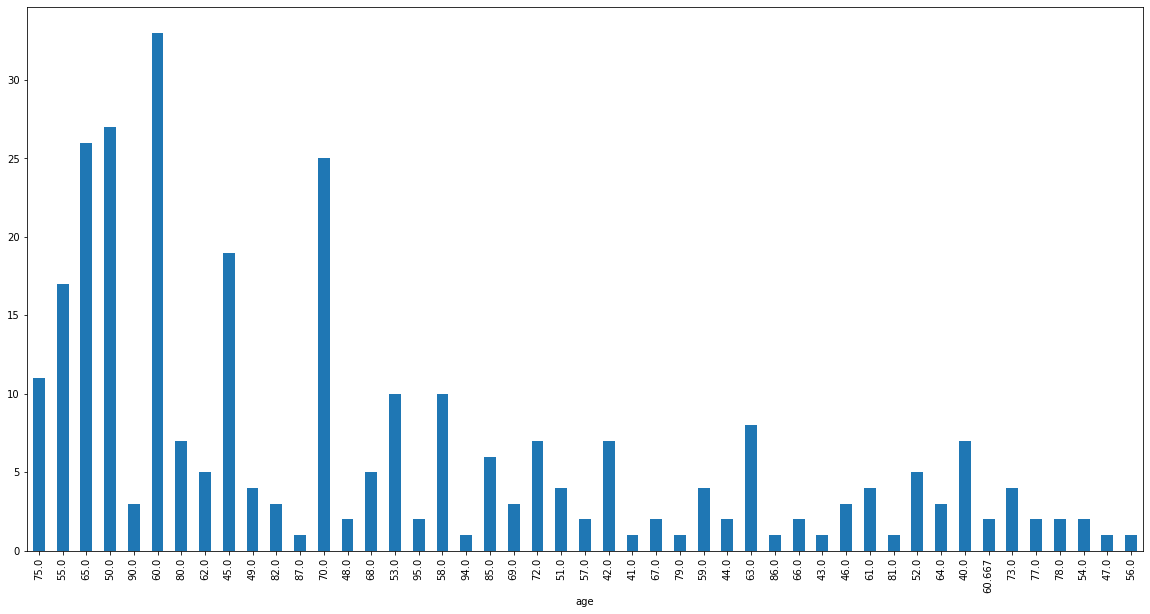

In [6]:
df['age'].value_counts(sort=False).plot(kind='bar', figsize=(20,10))

donne -> sex = 0
maschi-> man = 1

- si poteva fare con pivout table
- 


la percentuale di morte delle donne è:  DEATH_EVENT
1    0.32381
Name: count, dtype: float64
la percentuale di morte degli uomini è:  DEATH_EVENT
1    0.319588
Name: count, dtype: float64


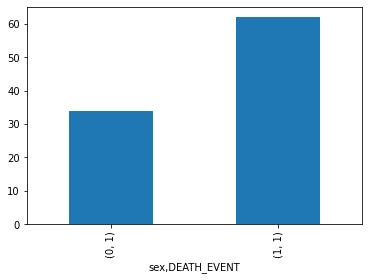

In [7]:
# seleziono i soli record con morte dei pazienti
df_death = df.loc[df['DEATH_EVENT'] == 1]
death = df_death.groupby('sex')['DEATH_EVENT'].value_counts()
death.plot(kind='bar')

#normalizzo i maschi morti per il totale dei maschi
#normalizzo le femmine morte per il totale delle femmine

total_man = df['sex'].value_counts()[1]
total_femm = df['sex'].value_counts()[0]

fem_death = death[0]/total_femm
man_death = death[1]/total_man

print('la percentuale di morte delle donne è: ', fem_death)   
print('la percentuale di morte degli uomini è: ', man_death)



In valore assoluto sono morte più donne che uomini, ma in proporzione al numero di donne e uomini, la percentuale di morte per i due sessi e pressochè la stessa.


# Parte 2


In [8]:


dt = pd.read_csv('./Clinical/heart_failure_clinical_records_dataset.csv', sep=',')




In [9]:
from sklearn.model_selection import train_test_split

X = dt.drop('DEATH_EVENT', axis=1)
y = dt['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(299, 12) (299,)
(199, 12) (199,)
(100, 12) (100,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [11]:
#funzione per calcolare confusion matrix e il report
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice 2x2
    labels = np.asarray(group_counts).reshape(2, 2)

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred = dtc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('acc train', acc_train)
print('acc test', acc_test)
cm_dtc = confusion_matrix(y_test, y_pred)

acc train 1.0
acc test 0.71


              precision    recall  f1-score   support

           0       0.72      0.85      0.78        61
           1       0.68      0.49      0.57        39

    accuracy                           0.71       100
   macro avg       0.70      0.67      0.67       100
weighted avg       0.71      0.71      0.70       100



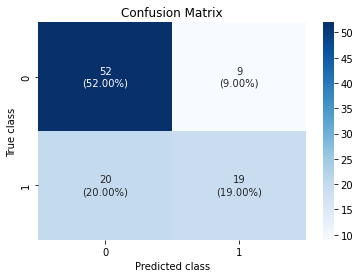

In [13]:
plot_confusion_matrix(cm_dtc)
print(classification_report(y_test, y_pred))


acc train:  0.8793969849246231
acc:  0.72
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        61
           1       0.70      0.49      0.58        39

    accuracy                           0.72       100
   macro avg       0.71      0.68      0.68       100
weighted avg       0.72      0.72      0.71       100



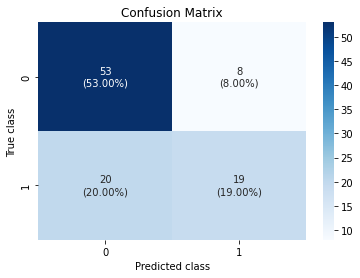

In [14]:
lr_2 = LogisticRegression(solver='liblinear')
lr_2.fit(X_train, y_train)
y_pred_test_lr = lr_2.predict(X_test)
y_pred_train_lr = lr_2.predict(X_train)
acc_train_lr = accuracy_score(y_train, y_pred_train_lr)
print('acc train: ', acc_train_lr)
acc_test_lr = accuracy_score( y_test, y_pred_test_lr)
print('acc: ', acc_test_lr)
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
plot_confusion_matrix(cm_lr)
print(classification_report(y_test, y_pred_test_lr))


acc train 0.7135678391959799
acc test 0.61


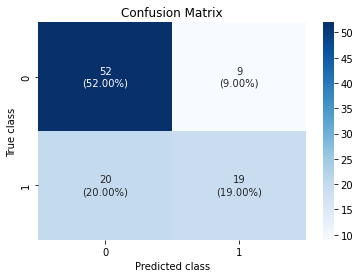

In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
y_pred_train = dummy.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred_test = dummy.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('acc train', acc_train)
print('acc test', acc_test)

cm_dummy = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_dummy)

In [16]:
from sklearn.model_selection import cross_val_score

# faccio il cross validation sul decision tree dtc con 10 fold 

cross_val = cross_val_score(dtc, X, y, cv = 5)
print('accuracy per ogni fold', cross_val)
print('accuracy media', cross_val.mean())
print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

accuracy per ogni fold [0.38333333 0.88333333 0.71666667 0.58333333 0.66101695]
accuracy media 0.6455367231638418
Accuracy con incertezza: 0.65 (+/- 0.33)


3. Considerare il dataset originale, eliminare l’attributo time, scalare il valore degli attributi a 
un intervallo (0,1) e allenare sui dati un modello di LinearRegression (https://scikit-
learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear
_model.LinearRegression). 


In [17]:
data = X.drop(['time'], axis=1)
print(data.head())

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(data)
data_sd = scaler.transform(data)
data_sd = pd.DataFrame(data_sd, columns=data.columns)
data_sd




    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  
0        0  
1        0  
2        1  
3        0  
4        0  


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.789474,0.0,0.074036,0.0,0.2500,1.0,0.311765,0.202128,0.878378,1.0,0.0
1,0.578947,0.0,1.000000,0.0,0.4750,0.0,0.309833,0.117021,0.918919,1.0,0.0
2,0.684211,0.0,0.018573,0.0,0.2500,0.0,0.190588,0.138298,0.871622,1.0,1.0
3,0.526316,1.0,0.014120,0.0,0.2500,0.0,0.247059,0.202128,0.925676,1.0,0.0
4,0.684211,1.0,0.020354,1.0,0.2500,0.0,0.384706,0.287234,0.783784,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.652632,0.0,0.007760,1.0,0.4750,1.0,0.182353,0.117021,0.966216,1.0,1.0
295,0.578947,0.0,0.231523,0.0,0.4750,0.0,0.317647,0.127660,0.939189,0.0,0.0
296,0.473684,0.0,0.262053,1.0,0.7500,0.0,0.872941,0.085106,0.932432,0.0,0.0
297,0.473684,0.0,0.306958,0.0,0.4750,0.0,0.164706,0.148936,0.945946,1.0,1.0


In [18]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(data_sd, y)
y_pred = model_lr.predict(data_sd)
acc = accuracy_score(y, y_pred)
print('acc: ', acc)
# parametri del modello



acc:  0.7290969899665551


Analizzare poi i coefficienti del modello e individuare i 5 attributi che 
in valore assoluto hanno il valore più elevato.

In [19]:
print(model_lr.coef_.__abs__())
#
print(type(model_lr.coef_.__abs__()))
coeff = model_lr.coef_.__abs__().tolist()
print(coeff)
coeff_df = pd.DataFrame(coeff, columns = data.columns)



[[2.01318584 0.24462602 0.74604004 0.04939139 2.58391406 0.30950824
  0.40467403 2.29227062 0.92379368 0.14343324 0.00437057]]
<class 'numpy.ndarray'>
[[2.0131858360242534, 0.24462601661319666, 0.746040036625189, 0.04939138985475511, 2.5839140598615704, 0.30950824070787897, 0.404674031193045, 2.292270615711022, 0.9237936782318436, 0.14343323838597552, 0.00437057231123711]]


 Costruire un nuovo dataset composto unicamente 
di quei 5 attributi, e usare la tecnica 5 Fold cross validation per valutare se l’accuratezza del 
modello Decision Tree  migliora. (punti 5)

In [20]:
#ORDINO LE COLONNE DEL DATAFRAME IN BASE AI COEFFICIENTI
coeff_df.sort_values(by=0, axis=1, ascending=False, inplace=True)
coeff_df

,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets,high_blood_pressure,anaemia,sex,diabetes,smoking
0,2.583914,2.292271,2.013186,0.923794,0.74604,0.404674,0.309508,0.244626,0.143433,0.049391,0.004371


In [21]:

#seleziono da data gli attributi corrispondenti ai coefficienti max in abs: colonne = eject_fraction, age, serum_sodium, serum_creatinine, high_blood_pressure ordinate per nome
data_lr_2 = data_sd.loc[:, ['ejection_fraction', 'age', 'serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase']]
data_lr_2 





,ejection_fraction,age,serum_sodium,serum_creatinine,creatinine_phosphokinase
0,0.2500,0.789474,0.878378,0.202128,0.074036
1,0.4750,0.578947,0.918919,0.117021,1.000000
2,0.2500,0.684211,0.871622,0.138298,0.018573
3,0.2500,0.526316,0.925676,0.202128,0.014120
4,0.2500,0.684211,0.783784,0.287234,0.020354
...,...,...,...,...,...
294,0.4750,0.652632,0.966216,0.117021,0.007760
295,0.4750,0.578947,0.939189,0.127660,0.231523
296,0.7500,0.473684,0.932432,0.085106,0.262053
297,0.4750,0.473684,0.945946,0.148936,0.306958


In [22]:

# faccio il cross validation sul decision tree dtc con 5 fold
cross_val = cross_val_score(model_lr, data_lr_2, y, cv = 10)
print('accuracy per ogni fold', cross_val)
print('accuracy media', cross_val.mean())
print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

accuracy per ogni fold [0.8        0.7        0.66666667 0.66666667 0.73333333 0.66666667
 0.7        0.7        0.7        0.72413793]
accuracy media 0.7057471264367816
Accuracy con incertezza: 0.71 (+/- 0.08)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



4. Considerare il dataset originale, eliminare l’attributo time,  e creare una pipeline in cui il 
valore degli attributi age e platelets sia discretizzato in 6 intervalli e gli attributi non booleani 
vengano ricondotti a valori nell’intervallo (0,1) e normalizzati con la funzione Normalizer. Si 
applichi poi un modello DecisionTree e si valuti l’accuratezza. (punti 4) 

In [24]:
dataset = pd.read_csv('./Clinical/heart_failure_clinical_records_dataset.csv')
Y = dataset['DEATH_EVENT']
X = dataset.drop(['DEATH_EVENT'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
# creare una pipeline in cui 
# il valore degli attributi age e platelets sia discretizzato in 6 intervalli
# gli attributi non booleani vengano ricondotti a valori nell’intervallo (0,1) e normalizzati con la funzione Normalizer


discr = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
# MinMaxScaler ridimensiona i dati in un intervallo specifico (di solito tra 0 e 1)
scaler = MinMaxScaler()
# mentre Normalizer normalizza i dati in modo che ogni riga abbia una lunghezza unitaria. La scelta tra le due tecniche dipenderà dalla natura dei dati e dall'obiettivo dell'analisi.
norm = Normalizer()

#appplico le trasformazioni ai soli di interesse, ovvero age e platelets per discr, gli attributi non booleani per scaler e norm
prep = ColumnTransformer(transformers= [('discr', discr, ['age', 'platelets']),
    ('scaler', scaler, ['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase']),
    ], remainder='passthrough')

In [26]:
model = DecisionTreeClassifier()

#Definisco la pipeline con le trasformazioni e il modello
pipeline = Pipeline(steps=[('prep', prep),
                            ('model', model)])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=6,
                                                                   strategy='uniform'),
                                                  ['age', 'platelets']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium',
                                                   'creatinine_phosphokinase'])])),
                ('model', DecisionTreeClassifier())])

In [27]:
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('acc train: ', acc_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('acc: ', acc)


acc train:  1.0
acc:  0.7833333333333333


5. Applicare una funzione per l’ottimizzazione dei parametri sia del modello di classificazione sia della pipeline verificare se l’accuratezza migliora. (punti 3).

In [28]:
# definisco i parametri da ottimizzare, ne metto un per il modello
# e uno per lo step di discretizzazione della pipeline
param_grid = { 
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [5, 7, 10],
    'prep__discr__strategy': ['uniform', 'quantile'],
    'prep__discr__n_bins': [ 4, 6, 10],
}

# definisco la griglia di ricerca
clf = GridSearchCV(pipeline, param_grid, cv=5) # verbose mostra i risultati di ogni fold

# eseguo la ricerca dei parametri
clf.fit(X_train, y_train)

# stampo tutti gli score per ogni combinazione di parametri
# print("Grid scores on development set:")
# print()
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#             % (mean, std * 2, params))
# print()

#stampo i parametri migliori
print('best parameters: ', clf.best_params_)
print('with accuracy: ', clf.best_score_)
print()

# settiamo i paramatri della pipeline 
# con i parametri migliori ottenuti dal grid search
pipeline.set_params(**clf.best_params_)

# addestriamo la pipeline con i parametri ottimizzati
# ne calcoliamo l'accuratezza sul train e sul test set
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('acc sul train della pipeline con i parametri ottimizzati: ', acc_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('acc della pipeline con i parametri ottimizzati: : ', acc)






best parameters:  {'model__criterion': 'entropy', 'model__max_depth': 5, 'prep__discr__n_bins': 10, 'prep__discr__strategy': 'quantile'}
with accuracy:  0.815868794326241

acc sul train della pipeline con i parametri ottimizzati:  0.9288702928870293
acc della pipeline con i parametri ottimizzati: :  0.9


6. Creare una pipeline che aggiunga alle features della pipeline del punto 4, le feature che 
derivano dalla applicazione di una PCA (https://scikit-
learn.org/stable/modules/generated/sklearn.decomposition.PCA.html mantenendo due 
dimensioni) e le feature che derivano dalla applicazione della funzione SelectKBest 
(https://scikit-
learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selec
tkbest#sklearn.feature_selection.SelectKBest scegliendo K=2). (punti 3). 


In [29]:
dataset = pd.read_csv('./Clinical/heart_failure_clinical_records_dataset.csv')
Y = dataset['DEATH_EVENT']
X = dataset.drop(['DEATH_EVENT'], axis=1)
X = X.drop(['time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [30]:
# feature union prende come input due o più trasformazioni e le applica in parallelo
# I trasformazione
# si rifa il column trasformer come prima
# II trasformazione
# si fa una pca con 2 componenti
# III trasformazione
# si fa una SelectKBest con k=2
# si fa il feature union tra pca e selectkbest e il dataset originale
# per aumentare il numero di attributi
# pipeline con column trasformer, feature union e modello

from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

#creo il column transformer come prima

discr = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
scaler = MinMaxScaler(feature_range=(0, 1))
norm = Normalizer()

#appplico le trasformazioni ai soli di interesse, ovvero age e platelets per discr, gli attributi non booleani per scaler e norm
prep = ColumnTransformer(transformers= [('discr', discr, ['age', 'platelets']),
    ('scaler', scaler, ['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase']),
    ], remainder='passthrough')




pca = PCA(n_components=2)
kbest = SelectKBest(k=2)

#creo la feature union
# serve nire lefeature della pca e skbest con il dataset X
combined_features = combined_features = FeatureUnion([('pca', pca), ('kbest', kbest)])




In [31]:
print(X.shape)
X_features = combined_features.fit_transform(X, y)
# X ha 12 attributi, dopo la feature union ne ha 16
X_f = pd.DataFrame(X_features.shape) 


(299, 11)


In [32]:
# pipeline con column trasformer, feature union e modello

model = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('prep', prep),
                            ('features', combined_features),
                            ('model', model)])
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('acc train: ', acc_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('acc: ', acc)

acc train:  1.0
acc:  0.6666666666666666
